In [491]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#import for kNearest Neighbors model
from sklearn import neighbors

- Number of Attributes: 10 plus the class attribute
 
 Attribute Information: (class attribute has been moved to last column)   
   
   Attribute                       Domain
   
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
   10. Mitoses                       1 - 10
   11. Class:                        (2 for benign, 4 for malignant)

In [492]:
# Read data
df = pd.read_csv("breast-cancer-wisconsin.csv")
df.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [493]:
df.replace('?',-99999,inplace=True)

#remove id column as it is just patient record id.....so drop
df.drop(['id'], axis=1, inplace=True)
df.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [494]:
# check if data contains null
df.isna().any()

clump_thickness           False
unif_cell_size            False
unif_cell_shape           False
marg_adhesion             False
single_epith_cell_size    False
bare_nuclei               False
bland_chrom               False
norm_nucleoli             False
mitoses                   False
class                     False
dtype: bool

In [495]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   clump_thickness         699 non-null    int64 
 1   unif_cell_size          699 non-null    int64 
 2   unif_cell_shape         699 non-null    int64 
 3   marg_adhesion           699 non-null    int64 
 4   single_epith_cell_size  699 non-null    int64 
 5   bare_nuclei             699 non-null    object
 6   bland_chrom             699 non-null    int64 
 7   norm_nucleoli           699 non-null    int64 
 8   mitoses                 699 non-null    int64 
 9   class                   699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [496]:
# the column bare_nuclei is object but the value is numeric so converting to numeric
# df['bare_nuclei'] = pd.to_numeric(df['bare_nuclei'])

# Outliers Detection and treatment
- Boxplots are the great way of detecting outliers, Once the outliers have been detected.
- They can be imputed with the 5th and 95th percentiles.

In [497]:
df.columns

Index(['clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'marg_adhesion',
       'single_epith_cell_size', 'bare_nuclei', 'bland_chrom', 'norm_nucleoli',
       'mitoses', 'class'],
      dtype='object')

<AxesSubplot:xlabel='mitoses'>

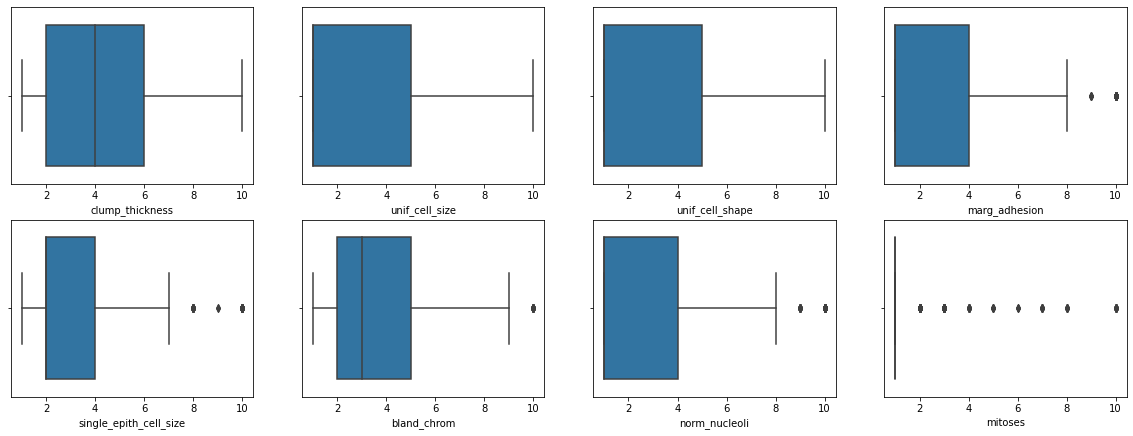

In [498]:
# Outlier detection using boxplots
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(x=df.clump_thickness)
plt.subplot(4,4,2)
sns.boxplot(x=df.unif_cell_size)
plt.subplot(4,4,3)
sns.boxplot(x=df.unif_cell_shape)
plt.subplot(4,4,4)
sns.boxplot(x=df.marg_adhesion)
plt.subplot(4,4,5)
sns.boxplot(x=df.single_epith_cell_size)
plt.subplot(4,4,6)
sns.boxplot(x=df.bland_chrom)
plt.subplot(4,4,7)
sns.boxplot(x=df.norm_nucleoli)
plt.subplot(4,4,8)
sns.boxplot(x=df.mitoses)

In [499]:
# Removing outliears as they required

df['marg_adhesion']=df['marg_adhesion'].clip(lower=df['marg_adhesion'].quantile(0.0), upper=df['marg_adhesion'].quantile(0.90))
df['single_epith_cell_size']=df['single_epith_cell_size'].clip(lower=df['single_epith_cell_size'].quantile(0.0), upper=df['single_epith_cell_size'].quantile(0.90))
df['bland_chrom']=df['bland_chrom'].clip(lower=df['bland_chrom'].quantile(0.0), upper=df['bland_chrom'].quantile(0.95))
df['norm_nucleoli']=df['norm_nucleoli'].clip(lower=df['norm_nucleoli'].quantile(0.0), upper=df['norm_nucleoli'].quantile(0.88))
df['mitoses']=df['mitoses'].clip(lower=df['mitoses'].quantile(0.0), upper=df['mitoses'].quantile(0.82))

<AxesSubplot:xlabel='mitoses'>

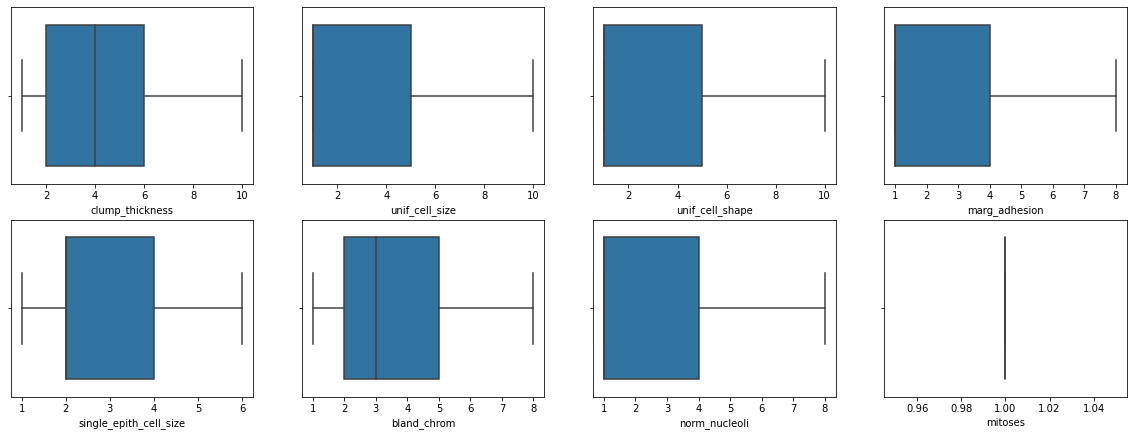

In [500]:
# Outlier detection using boxplots
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(x=df.clump_thickness)
plt.subplot(4,4,2)
sns.boxplot(x=df.unif_cell_size)
plt.subplot(4,4,3)
sns.boxplot(x=df.unif_cell_shape)
plt.subplot(4,4,4)
sns.boxplot(x=df.marg_adhesion)
plt.subplot(4,4,5)
sns.boxplot(x=df.single_epith_cell_size)
plt.subplot(4,4,6)
sns.boxplot(x=df.bland_chrom)
plt.subplot(4,4,7)
sns.boxplot(x=df.norm_nucleoli)
plt.subplot(4,4,8)
sns.boxplot(x=df.mitoses)

<AxesSubplot:>

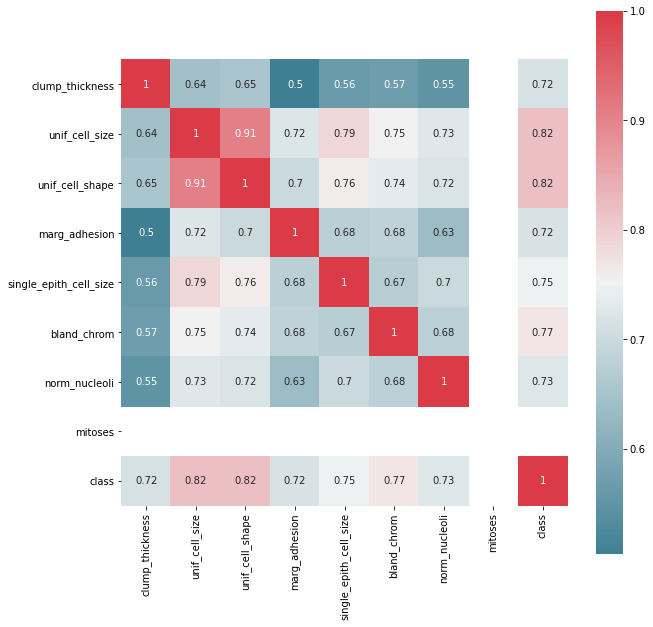

In [501]:
f, ax = plt.subplots(figsize=(10, 10))
corr = df.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

In [502]:
#we want to predict class based on other columns (which are input)

X =np.array(df.drop(['class'], axis=1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [503]:
#use kNearest Neighbors model (classifier)
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)

accuracy = clf.score(X_test,y_test)
print(accuracy)

0.9857142857142858


# Testing single row (new data)

In [504]:
#now predict for some new  data (i.e different data)

example_measures = np.array([4,2,1,1,1,2,3,2,1])
example_measures = example_measures.reshape(1,9)
prediction = clf.predict(example_measures)
print(prediction)

[2]


In [505]:
#do more predictions, now 3 inputs (i.e 3 rows of 9 cols)
example_measures = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,2,2,2,3,2,1],[5,5,1,5,5,6,4,5,7]])

example_measures = example_measures.reshape(example_measures.shape[0],-1) #or example_measures.reshape(1,-1)
prediction = clf.predict(example_measures)
print(prediction)

[2 2 2]
